In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 4.8MB/s eta 0:00:01   66% |█████████████████████▎          | 7.8MB 43.3MB/s eta 0:00:01
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# import required modules
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

%matplotlib inline

In [4]:
# read Twitter-sentiment-self-drive.xlsx in for DF using read_excel
df = pd.read_excel('Twitter-sentiment-self-drive.xlsx')

In [10]:
# print info to see data set information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 5 columns):
_unit_id                 7156 non-null int64
sentiment                7156 non-null object
sentiment:confidence     7156 non-null float64
sentiment_gold_reason    77 non-null object
text                     7156 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 279.6+ KB


In [11]:
#check the data
df.head(10)

,_unit_id,sentiment,sentiment:confidence,sentiment_gold_reason,text
0,724227031,5,0.7579,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,5,0.8775,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,2,0.6805,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,2,0.8820,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,3,1.0000,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
5,724227036,3,1.0000,Author is asking a question without expressing...,Will driverless cars eventually replace taxi d...
6,724227037,not_relevant,0.5367,Trains (metros) are not relevant to the focus ...,Chicago metro expected to be fully autonomous ...
7,724227038,not_relevant,0.6548,Author is not referring to self-driving cars. ...,I love the infotainment system in my new car. ...
8,724227039,5,0.7187,Shows excitement that autonomous vehicles will...,Autonomous vehicles could reduce traffic fatal...
9,724227040,1,0.6412,Shows fear that driverless cars will not be sa...,Driverless cars are not worth the risk. Don't...


In [28]:
df.isnull().sum()

_unit_id                    0
sentiment                   0
sentiment:confidence        0
sentiment_gold_reason    7079
text                        0
dtype: int64

In [30]:
#data is NAN for null value in sentiment_gold_reason
df.sort_values(by=['sentiment:confidence'], ascending=True).iloc[:10]

,_unit_id,sentiment,sentiment:confidence,sentiment_gold_reason,text
4684,724325839,not_relevant,0.2480,NaN,@samuelfine I very rarely drive for any distan...
3578,724324730,4,0.2505,NaN,If I see this car on my street I̢���m going t...
3341,724324493,2,0.2510,NaN,It's the fucking Google Car!!!̡�����it's way t...
2449,724323598,5,0.2557,NaN,Just saw the Google Car! Young Boy about to be...
6149,724327306,5,0.2564,NaN,̢���@thelastminute: BMW̢���s self driving ca...
5626,724326782,3,0.2568,NaN,@Beyond1percent In NO WAY am I saying the tech...
285,724321432,5,0.2571,NaN,"Jeff Owens, @DelphiAuto CTO: A fully autonomou..."
3451,724324603,5,0.2577,NaN,It's the google car!! http://t.co/46ev6WNk
1025,724322173,4,0.2602,NaN,I'm over here writing a 2000 word essay while ...
2340,724323489,not_relevant,0.2606,NaN,SAW THE GOOGLE CAR TODAY AT WORK!!!!!! 1 life ...


In [33]:
#remove not relevant sentiment
final_df = df[df.sentiment != 'not_relevant']
final_df.head(15)


,_unit_id,sentiment,sentiment:confidence,sentiment_gold_reason,text
0,724227031,5,0.7579,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,5,0.8775,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,2,0.6805,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,2,0.8820,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,3,1.0000,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
5,724227036,3,1.0000,Author is asking a question without expressing...,Will driverless cars eventually replace taxi d...
8,724227039,5,0.7187,Shows excitement that autonomous vehicles will...,Autonomous vehicles could reduce traffic fatal...
9,724227040,1,0.6412,Shows fear that driverless cars will not be sa...,Driverless cars are not worth the risk. Don't...
10,724227041,3,0.9184,"Simply states a fact, not an opinion","Driverless cars are now legal in Florida, Cali..."
11,724227610,3,1.0000,NaN,Audi is the first carmaker to get a license fr...


In [34]:
print(final_df[(final_df.sentiment == 5)].count())

_unit_id                 459
sentiment                459
sentiment:confidence     459
sentiment_gold_reason     16
text                     459
dtype: int64


In [39]:
df_sentiment_confident = final_df[['sentiment','sentiment:confidence']]
df_sentiment_confident.head(10)

,sentiment,sentiment:confidence
0,5,0.7579
1,5,0.8775
2,2,0.6805
3,2,0.8820
4,3,1.0000
5,3,1.0000
8,5,0.7187
9,1,0.6412
10,3,0.9184
11,3,1.0000


In [44]:
df_sentiment = df_sentiment_confident.sentiment.value_counts(ascending = True)[:10]
df_sentiment

1     110
5     459
2     685
4    1444
3    4245
Name: sentiment, dtype: int64

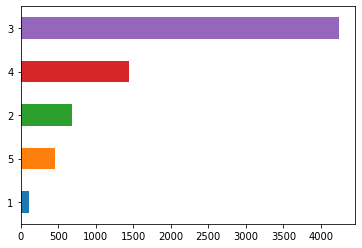

In [45]:
# present bar graph to represent numner of count for each sentiment 
df_sentiment.plot(kind='barh')